### COMP47490 Assignment 2

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from math import sqrt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,balanced_accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,auc
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier

### Question 1 
Using your dataset, perform the tasks below using Python and Scikit-learn.

### (a)
  Clean and prepare the dataset for machine learning analysis. You can do basic feature 
engineering to make your techniques scalable, but there is no need to go overboard 
with the dataset cleaning. Carefully consider the evaluation measure(s) that you use 
for this exercise and justify why you selected the particular evaluation measure(s).

In [4]:
# Load dataset into df
df = pd.read_csv('census_19209905.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,49,Private,60751,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
1,71,State-gov,100063,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K
2,59,Private,361494,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K
3,35,Private,150042,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
4,49,Private,199763,Some-college,10,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,35,United-States,<=50K


In [5]:
df.shape

(10000, 15)

In [6]:
#remove columns name space
df.columns = df.columns.str.strip()

In [7]:
# remove all space in the values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].str.strip()

In [8]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
Income-category    object
dtype: object

In [9]:
#Find and Drop duplicates from this dataset
df.duplicated().sum()

4

In [10]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,49,Private,60751,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K
1,71,State-gov,100063,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K
2,59,Private,361494,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K
3,35,Private,150042,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
4,49,Private,199763,Some-college,10,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,35,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,53,?,220640,Bachelors,13,Divorced,?,Other-relative,Other,Female,0,0,20,United-States,<=50K
9996,36,Private,145576,Masters,14,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,1977,40,Japan,>50K
9997,36,Private,218490,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,<=50K
9998,26,Private,112754,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,65,United-States,>50K


<Axes: ylabel='Income-category'>

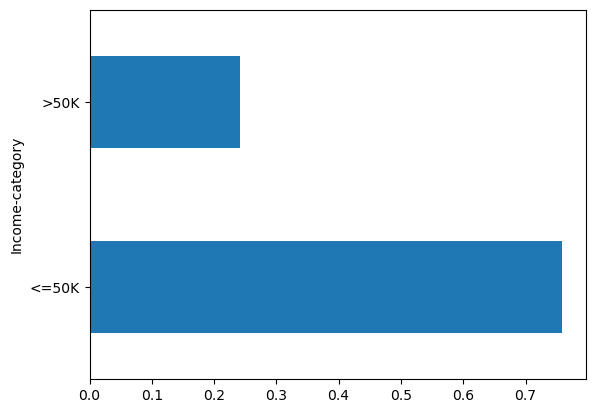

In [11]:
# Plot Class distribution for this dataset
df['Income-category'].value_counts(normalize=True).plot.barh()

Due to the class column only have two >50k or <= 50k , I replace them with 1 or 0 for ease to observation.

In [12]:
df['Income-category'] = df['Income-category'].replace('>50K',1)
df['Income-category'] = df['Income-category'].replace('<=50K',0)
df['Income-category'].value_counts()

Income-category
0    7584
1    2416
Name: count, dtype: int64

Change the class column type to integer. or we can also change it to binary.

In [13]:
df['Income-category'] = df['Income-category'].astype('int')

### Handling Missing Data:

In [14]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
Income-category    0
dtype: int64

In [15]:
# When i check the dataset, the missing value was fill by "?", so lets find the number of "?" in each column
df.replace("?", pd.NA, inplace=True)
missing_value = df.isnull().sum()
missing_value

age                  0
workclass          558
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation         560
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     181
Income-category      0
dtype: int64

Removing Missing Values:
We just use dropna to drop these missing values because these are relatively small compared to my dataset size.(10000)

In [16]:
df.dropna(inplace=True)
df.nunique()

age                  72
workclass             7
fnlwgt             7933
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain         97
capital-loss         66
hours-per-week       85
native-country       40
Income-category       2
dtype: int64

### check outliers

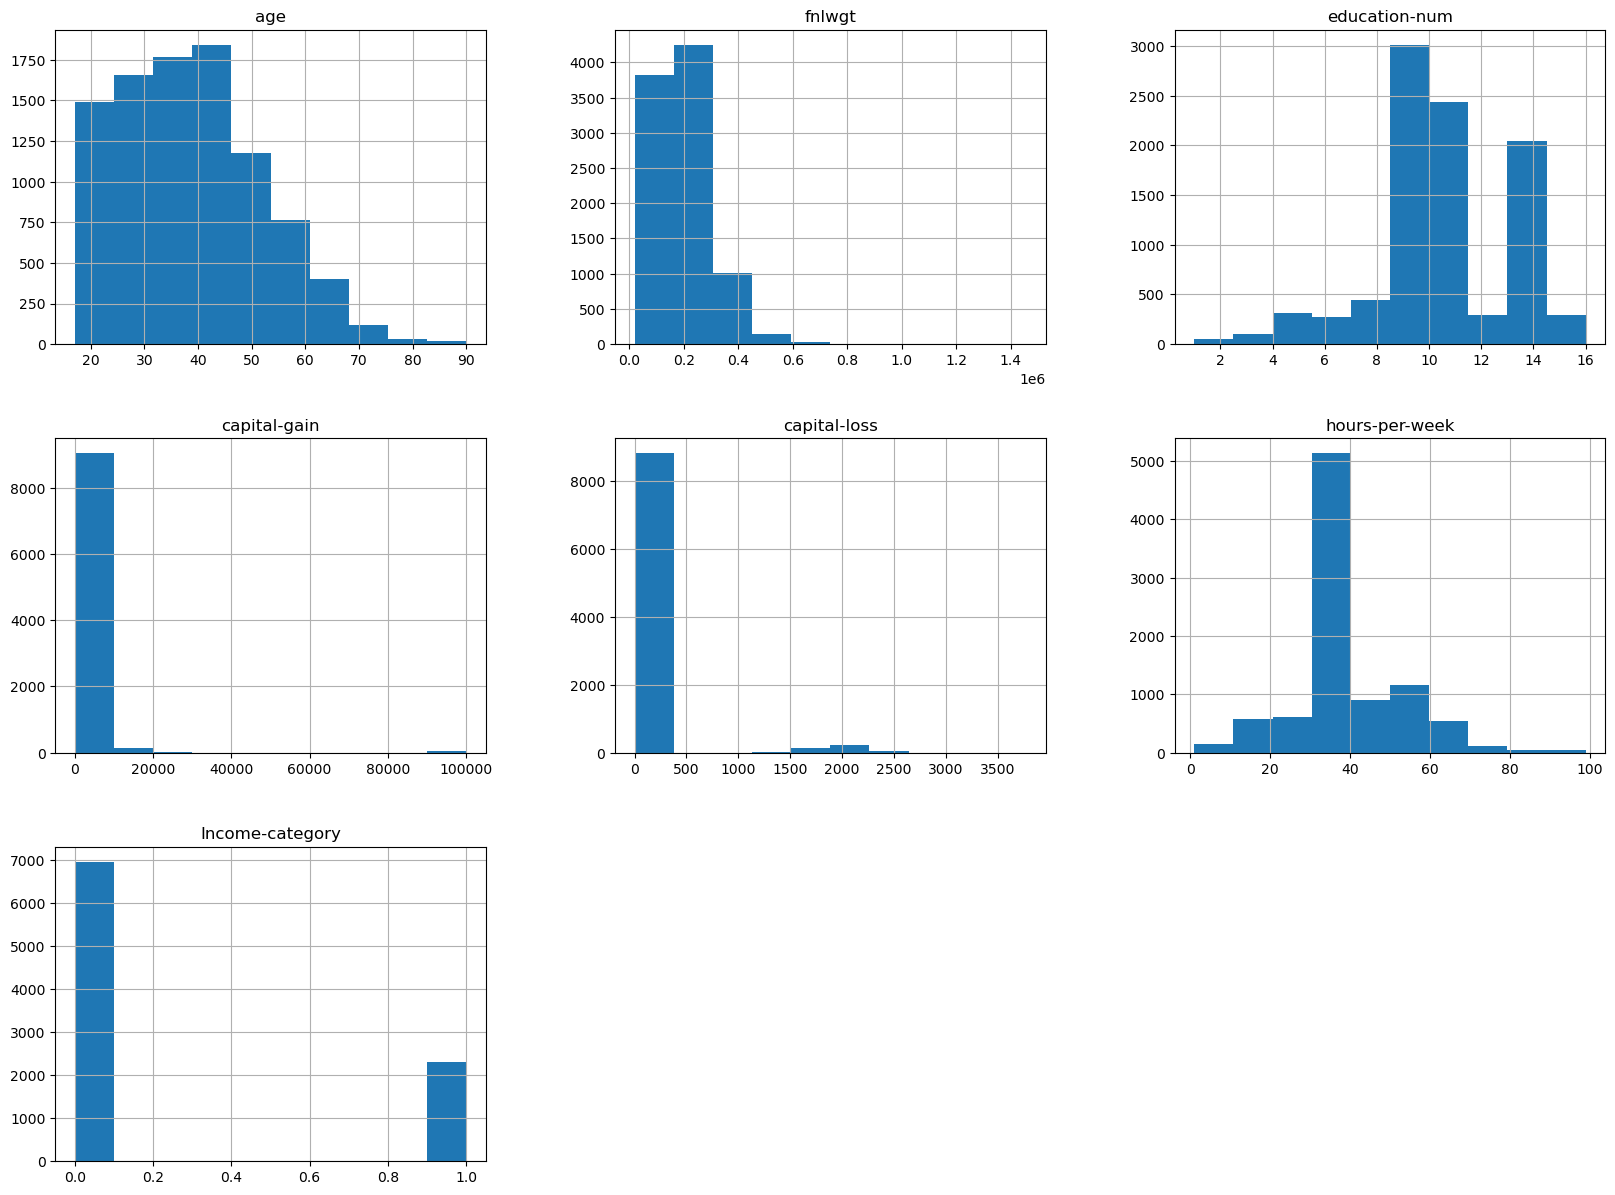

In [17]:
df.hist(figsize=(20,20), layout=(4,3))
plt.grid(which='major',linestyle='-')

After observationm, there is no any normal distribution for this dataset

age                   Axes(0.125,0.712609;0.227941x0.167391)
fnlwgt             Axes(0.398529,0.712609;0.227941x0.167391)
education-num      Axes(0.672059,0.712609;0.227941x0.167391)
capital-gain          Axes(0.125,0.511739;0.227941x0.167391)
capital-loss       Axes(0.398529,0.511739;0.227941x0.167391)
hours-per-week     Axes(0.672059,0.511739;0.227941x0.167391)
Income-category        Axes(0.125,0.31087;0.227941x0.167391)
dtype: object

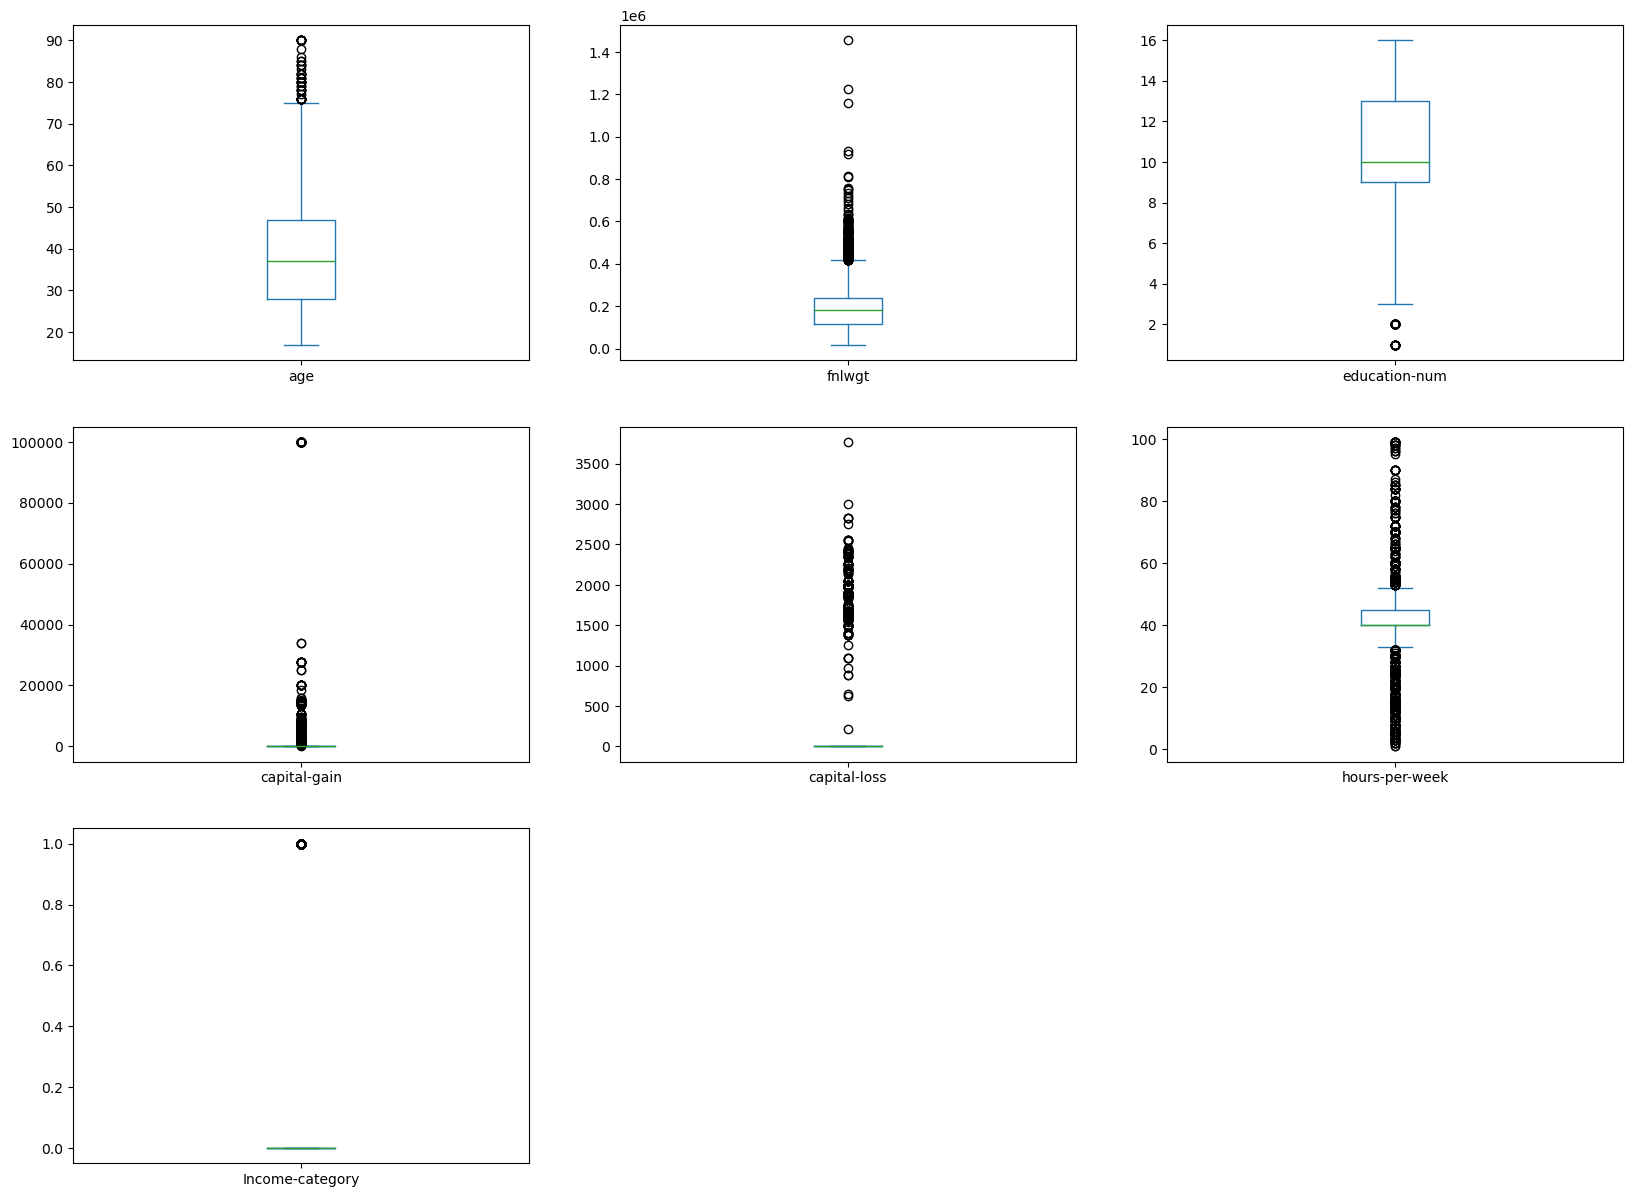

In [18]:
df.plot(kind='box', subplots=True, figsize=(20,20), layout=(4, 3), sharex=False, sharey=False)

We create a function that find all outliers and decide remove or not.

In [19]:
def find_outliers(df, columns=None):
    if columns is None:
        columns = df.columns
    outliers = pd.DataFrame()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, column_outliers])
    return outliers

In [20]:
find_outliers(df, columns=["hours-per-week"])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
7,19,Private,174732,Some-college,10,Never-married,Other-service,Own-child,Black,Male,0,0,25,United-States,0
13,23,Private,256628,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,32,United-States,0
18,64,Private,253759,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,3,United-States,0
19,42,Self-emp-inc,27187,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,1
22,42,Private,178537,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,24,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,36,State-gov,223020,Some-college,10,Divorced,Other-service,Unmarried,Black,Female,0,0,20,United-States,0
9989,68,Private,73773,HS-grad,9,Widowed,Sales,Not-in-family,White,Female,0,0,24,United-States,0
9992,42,Private,366180,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,1
9997,36,Private,218490,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,0


 In certain professions or situations, working over 80 hours per week might be common or even expected. For instance, some medical professionals or individuals in highly demanding jobs might work longer hours.

In [21]:
find_outliers(df, columns=["age"])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
127,76,Self-emp-not-inc,236878,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,30,United-States,0
294,85,Self-emp-not-inc,166027,HS-grad,9,Widowed,Sales,Not-in-family,White,Female,0,0,50,United-States,0
734,81,Private,129338,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,10,United-States,0
1099,81,Private,98116,Bachelors,13,Widowed,Sales,Not-in-family,White,Male,0,0,50,United-States,1
1201,90,Private,206667,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,1
1369,76,Private,93125,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,1424,0,24,United-States,0
1578,82,Private,152148,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,2,United-States,0
1606,80,Private,173488,Some-college,10,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,20,United-States,0
1622,90,Local-gov,153602,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,6767,0,40,United-States,0
1885,80,Self-emp-not-inc,184335,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,30,United-States,0


In some contexts, individuals above 90 years old might be valid data points, especially in studies related to longevity, healthcare, or demographics. So we keep it.

In capital-gain and capital-loss, the presence of outliers is not uncommon. Capital gains and losses can vary significantly based on various factors, including investment decisions, market volatility, exceptional events, or specific transactions. Therefore, it's quite typical to encounter outliers or extreme values in these columns. So we keep it in this dataset.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9265 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              9265 non-null   int64 
 1   workclass        9265 non-null   object
 2   fnlwgt           9265 non-null   int64 
 3   education        9265 non-null   object
 4   education-num    9265 non-null   int64 
 5   marital-status   9265 non-null   object
 6   occupation       9265 non-null   object
 7   relationship     9265 non-null   object
 8   race             9265 non-null   object
 9   sex              9265 non-null   object
 10  capital-gain     9265 non-null   int64 
 11  capital-loss     9265 non-null   int64 
 12  hours-per-week   9265 non-null   int64 
 13  native-country   9265 non-null   object
 14  Income-category  9265 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 1.1+ MB


| Feature | Description | Data Quality Issue | Handling Strategy    |
| --- | --- | --- | --- |
| `age` | Age of individuals. | some outliers exist but can be ignore | Keep as it |
| `workclass` | Employment type (e.g., Private, State-gov, Local-gov). | Have missing values| Replace `?` with Null, Then dropna. one-hot encoding |
| `fnlwgt` | A weight assigned to each individual, which is often used in surveys. | Useless | Drop column |
| `education` | Highest level of education achieved. | Useless, can be instead | Drop column |
|`education_num` | Numeric representation of education level. | Good | Keep as it |
| `marital_status` | Marital status of individuals. |Good| one-hot encodind  |
| `occupation` | Occupation of individuals. | Have missing values |Replace `?` with Null, Then dropna. one-hot encoding |
| `relationship` | Relationship status (Husband, Wife, Not-in-family). | Good | one-hot encoding |
| `race` | Race of individuals. | Good | one-hot encoding |
| `sex` | Gender of individuals. | Good | one-hot encoding |
| `capital_gain` | Capital gains for individuals. | some outliers exist but can be ignore | Keep as it |
| `capital_loss` | Capital losses for individuals.| some outliers exist but can be ignore | Keep as it |
| `hours_per_week` | Number of hours worked per week | Some outliers exist but can be ignore | Keep as it |
| `native_country` | Native country of individuals. | Have missing values | Replace `?` with Null, Then dropna. one-hot encoding |
| `Income-category`| Income category, which appears to be the target variable. | Not conducive to observation | Convert > 50k and <= 50k to 1 and 0 |

after consideration I decide to drop columns 'fnlwgt' and 'education',
The "fnlwgt" column, which represents a weight assigned to each individual, is often used in surveys and doesn't typically have a clear interpretation for most machine learning models. And the "education" column we have "education-num" instead of it.

In [23]:
df.drop(columns=['fnlwgt', 'education'], inplace=True)

For the other columns, such as "workclass," "marital-status," "occupation," "relationship," "race," "sex," and "native-country," I encode them using one-hot encoding.

In [24]:
categorical_column = ['workclass','marital-status','occupation','relationship','race','sex','native-country']
df_encoded = pd.get_dummies(df, columns=categorical_column)

# Evaluation measure

In [25]:
df_measure = df_encoded.copy()

In [26]:
X = df_measure.drop("Income-category",axis=1)
y = df_measure["Income-category"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)

In [28]:
classifier = RandomForestClassifier(random_state=1)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [29]:
y_predicted = classifier.predict(X_test)
balanced_accuracy = balanced_accuracy_score(y_test, y_predicted)
print(f"Balanced Accuracy: {balanced_accuracy:.3f}")

Balanced Accuracy: 0.768


Due to imbalanced dataset, Balanced Accuracy score is the best feature to compare different classifier performance.

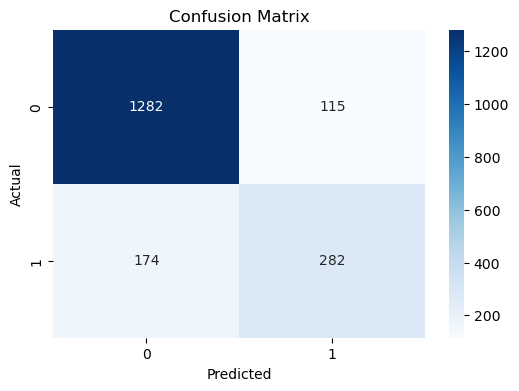

In [30]:
conf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Confusion matrices are valuable tools for understanding the performance of a classifier, especially when dealing with imbalanced datasets or when different types of errors have varying costs or importance in your problem domain. They provide a detailed breakdown of the model's predictions, enabling deeper analysis of its strengths and weaknesses.

### (b)
Evaluate the performance of three basic classifiers on your dataset: a decision tree 
with depth at most 3, a neural network with at most 10 hidden nodes and 1-NN. You 
can do basic parameter tuning, but there is no need to go overboard. The goal in this 
step is simply to create better than random classifiers. 

In [31]:
df_b = df_encoded.copy()

In [32]:
X = df_b.drop("Income-category",axis=1)
y = df_b["Income-category"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)

In [34]:
# create a grid search function to find best parameters (hyperparameter tuning)
from sklearn.model_selection import GridSearchCV

def perform_grid_search(model, param_grid,cv=5):
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='balanced_accuracy')
    grid_search.fit(X_train, y_train)       
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    cv_results = grid_search.best_score_
    return best_model, best_params, cv_results

In [35]:
Dtree = DecisionTreeClassifier(random_state=0)
Dtree_best = perform_grid_search(Dtree,param_grid = {
    "max_depth": range(1, 4),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
})
Dtree_best

(DecisionTreeClassifier(max_depth=3, random_state=0),
 {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2},
 0.7328269314052385)

In [36]:
neural_network = MLPClassifier(random_state=0,max_iter=1000)
neural_network_best = perform_grid_search(neural_network,param_grid = {
        'hidden_layer_sizes': [(i,) for i in range(1, 11)],
    })

In [37]:
neural_network_best

(MLPClassifier(hidden_layer_sizes=(6,), max_iter=1000, random_state=0),
 {'hidden_layer_sizes': (6,)},
 0.7667954484521319)

In [38]:
knn = KNeighborsClassifier(n_neighbors=1)
knn_best  = perform_grid_search(knn, param_grid={'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']})
knn_best

(KNeighborsClassifier(metric='manhattan', n_neighbors=1),
 {'metric': 'manhattan', 'weights': 'uniform'},
 0.7502033590079786)

In [39]:
# Best parameter applies to three classifiers
Dtree = DecisionTreeClassifier(max_depth=3, random_state=0,min_samples_leaf=1,min_samples_split=2)
neural_network = MLPClassifier(hidden_layer_sizes=(6,), max_iter=1000, random_state=0)
Knn = KNeighborsClassifier(metric='manhattan', n_neighbors=1,weights='uniform')

In [40]:
result_b = [
    ["DecisionTree", 0.7328269314052385],
    ["Neural_Network", 0.7667954484521319],
    ["Knn", 0.7502033590079786]
]
result_b = pd.DataFrame(result_b, columns=['Method', 'Balanced Accuracy Score'])
result_b


,Method,Balanced Accuracy Score
0,DecisionTree,0.732827
1,Neural_Network,0.766795
2,Knn,0.750203


Apply those three classifiers with grid search function to do basic parameter tuning, find the parameter which better than random.


`Neural Network` --- MLPClassifier(hidden_layer_sizes=(6,), max_iter=1000, random_state=0) Has the best performance with Balanced accuracy 0.7668

### (c)
Apply ensembles with bagging using the three classifiers from Task (b). Investigate 
the performance of each of these classifiers as the ensemble size increases (e.g., in 
steps  of  2  from  2  to  20  members).  Using  the  best  performing  ensemble  size, 
investigate how changing the number of instances in the bootstrap samples affects 
classification performance. 

In [41]:
ensemble_size = range(2,21,2)
results_c1= []

Create a function that apply different ensemble size in steps of 2 from 2 to 20 to find a best ensemble size.

In [42]:
def find_bestc1(classifier,X_test, y_test,ensemble_size):
    best_accuracy = 0.0
    best_size = 0
    for size in ensemble_size:
        bagging_classifier = BaggingClassifier(
            estimator=classifier, n_estimators=size, max_samples=1.0, bootstrap=True, random_state=1,max_features=1.0
        )
        bagging_classifier.fit(X_train, y_train)
        y_pred = bagging_classifier.predict(X_test)
        accuracy = balanced_accuracy_score(y_test, y_pred)
        results_c1.append((classifier,size,accuracy))
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_size = size
    
    return best_size, best_accuracy

In [43]:
c1 = find_bestc1(Dtree,X_test,y_test,ensemble_size)

In [44]:
c1

(2, 0.7318604088962564)

In [45]:
c2 = find_bestc1(neural_network,X_test,y_test,ensemble_size)

In [46]:
c2

(12, 0.7740443180248402)

In [47]:
c3 = find_bestc1(Knn,X_test,y_test,ensemble_size)

In [48]:
c3

(12, 0.7598417347951123)

In [49]:
pd.DataFrame(results_c1,columns=["classifier","ensemble_size","balanced_accuracy_score"])

,classifier,ensemble_size,balanced_accuracy_score
0,"DecisionTreeClassifier(max_depth=3, random_sta...",2,0.731860
1,"DecisionTreeClassifier(max_depth=3, random_sta...",4,0.731860
2,"DecisionTreeClassifier(max_depth=3, random_sta...",6,0.730741
3,"DecisionTreeClassifier(max_depth=3, random_sta...",8,0.730741
4,"DecisionTreeClassifier(max_depth=3, random_sta...",10,0.730741
5,"DecisionTreeClassifier(max_depth=3, random_sta...",12,0.730741
6,"DecisionTreeClassifier(max_depth=3, random_sta...",14,0.730741
7,"DecisionTreeClassifier(max_depth=3, random_sta...",16,0.730741
8,"DecisionTreeClassifier(max_depth=3, random_sta...",18,0.730741
9,"DecisionTreeClassifier(max_depth=3, random_sta...",20,0.730741


Use the best parameter with 3 different classifiers we got from Task(b), applies different ensemble size to find best balanced_accuracy score.   
After this job, we can find   
DecisionTree with ensemble size 2 or 4 will return best balanced_accuracy score 0.731860.   
Neural Network with ensemble size 12 will return best balanced_accuracy score 0.774044.    
Knn with ensemble size 12 will return best balanced_accuracy score 0.759842.  
Above these, the best classifier is `Neural Network`(MLPClassifier(hidden_layer_sizes=(6,), max_iter=1000, random_state=0)) with ensemble size can get highest balanced_accuracy score `0.774044`. Which has improve from Task(b)[balanced_accuracy score 0.7668].

In [50]:
samples  = [0.25,0.50,0.75]
results_c2 = []

In [51]:
def find_bestc2(classifier,X_test, y_test,ensemble_size,subspacing):
    best_accuracy = 0.0
    best_sample =0.00
    for sample in samples:
        bagging_classifier = BaggingClassifier(
        estimator=classifier, n_estimators=ensemble_size, max_samples=sample, bootstrap=True, random_state=1,max_features=1.0
        )
        bagging_classifier.fit(X_train, y_train)
        y_pred = bagging_classifier.predict(X_test)
        accuracy = balanced_accuracy_score(y_test, y_pred)
        results_c2.append((classifier,sample,accuracy))
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_sample = sample
            
    
    return best_sample, best_accuracy

In [52]:
c4 = find_bestc2(Dtree,X_test,y_test,2,samples)

In [53]:
c4

(0.5, 0.7318604088962564)

In [54]:
c5 = find_bestc2(neural_network,X_test,y_test,12,samples)

In [55]:
c5

(0.75, 0.7690108189227542)

In [56]:
c6 = find_bestc2(Knn,X_test,y_test,12,samples)

In [57]:
c6

(0.25, 0.7762828240967488)

In [58]:
pd.DataFrame(results_c2,columns=["classifier","sample size","balanced_accuracy_score"])

,classifier,sample size,balanced_accuracy_score
0,"DecisionTreeClassifier(max_depth=3, random_sta...",0.25,0.729645
1,"DecisionTreeClassifier(max_depth=3, random_sta...",0.50,0.731860
2,"DecisionTreeClassifier(max_depth=3, random_sta...",0.75,0.731860
3,"MLPClassifier(hidden_layer_sizes=(6,), max_ite...",0.25,0.743632
4,"MLPClassifier(hidden_layer_sizes=(6,), max_ite...",0.50,0.768249
5,"MLPClassifier(hidden_layer_sizes=(6,), max_ite...",0.75,0.769011
6,"KNeighborsClassifier(metric='manhattan', n_nei...",0.25,0.776283
7,"KNeighborsClassifier(metric='manhattan', n_nei...",0.50,0.760375
8,"KNeighborsClassifier(metric='manhattan', n_nei...",0.75,0.759035


After obervation, we can get best for   
decision tree with bootstrap samples size 0.5, balanced_accuracy 0.73186. 
Neural Network with bootstrap samples size 0.75, balanced_accuracy 0.76901. 
Knn with bootstrap samples size 0.25, balanced_accuracy 0.77628. 
Above these result, `Knn` has the best performance (balanced_accuracy `0.77628`) than the other two classifier.(Neural Network was best in last Task)  
Which has improve from Task(c)[Knn balanced_accuracy score 0.759852].

(d)  Apply ensembles with random subspacing using the three classifiers from Task (b). 
Investigate  the  performance  of  each  of  these  classifiers  as  the  ensemble  size 
increases (e.g., in steps of 2 from 2 to 20 members). Using the best performing 
ensemble size, investigate how changing the number of features used when applying 
random subspacing affects classification performance.

In [82]:
results_d1=[]

In [83]:
def find_bestd1(classifier,X_test, y_test,ensemble_size):
    best_accuracy = 0.0
    best_size = 0
    for size in ensemble_size:
        bagging_classifier = BaggingClassifier(
            estimator=classifier, n_estimators=size, max_samples=1.0, bootstrap=False, random_state=1,max_features=0.5
        )
        bagging_classifier.fit(X_train, y_train)
        y_pred = bagging_classifier.predict(X_test)
        accuracy = balanced_accuracy_score(y_test, y_pred)
        results_d1.append((classifier,size,accuracy))
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_size = size
    
    return best_size, best_accuracy

In [84]:
d1 = find_bestd1(Dtree,X_test,y_test,ensemble_size)
d1

(20, 0.7310763038591468)

In [85]:
d2 = find_bestd1(neural_network,X_test,y_test,ensemble_size)
d2

(12, 0.737700774843336)

In [86]:
d3 = find_bestd1(Knn,X_test,y_test,ensemble_size)
d3

(20, 0.7751863328686786)

In [64]:
pd.DataFrame(results_d1,columns=["classifier","ensemble_size","balanced_accuracy_score"])

,classifier,ensemble_size,balanced_accuracy_score
0,"DecisionTreeClassifier(max_depth=3, random_sta...",2,0.682496
1,"DecisionTreeClassifier(max_depth=3, random_sta...",4,0.715368
2,"DecisionTreeClassifier(max_depth=3, random_sta...",6,0.712794
3,"DecisionTreeClassifier(max_depth=3, random_sta...",8,0.713890
4,"DecisionTreeClassifier(max_depth=3, random_sta...",10,0.714987
5,"DecisionTreeClassifier(max_depth=3, random_sta...",12,0.726690
6,"DecisionTreeClassifier(max_depth=3, random_sta...",14,0.716083
7,"DecisionTreeClassifier(max_depth=3, random_sta...",16,0.719373
8,"DecisionTreeClassifier(max_depth=3, random_sta...",18,0.727787
9,"DecisionTreeClassifier(max_depth=3, random_sta...",20,0.731076


After this job, we can find   
DecisionTree with ensemble size 20 will return best balanced_accuracy score 0.731076.   
Neural Network with ensemble size 12 will return best balanced_accuracy score 0.73770.    
Knn with ensemble size 20 will return best balanced_accuracy score 0.77519.  
Above these, the best classifier is `Knn` with ensemble size `20` can get highest balanced_accuracy score `0.77519`.

Create a function that apply different ensemble size in steps of 2 from 2 to 20 and different subspacing [0.25,0.50,0.75] to find a best ensemble size and subspacing.

In [87]:
results_d2 = []

In [88]:
def find_bestd2(classifier,X_test, y_test,size):
    best_accuracy = 0.0
    best_feature = 0.0
    for feature in np.arange(0.3,0.9,0.1):
        bagging_classifier = BaggingClassifier(
            estimator=classifier, n_estimators=size, max_samples=1.0,bootstrap=False, random_state=1,max_features=feature
        )
        bagging_classifier.fit(X_train, y_train)
        y_pred = bagging_classifier.predict(X_test)
        accuracy = balanced_accuracy_score(y_test, y_pred)
        results_d2.append((classifier,feature,accuracy))
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature = feature
    
    return best_feature, best_accuracy

In [89]:
d4 = find_bestd2(Dtree,X_test,y_test,20)
d4

(0.5, 0.7310763038591468)

In [90]:
d5 = find_bestd2(neural_network,X_test,y_test,12)
d5

(0.8000000000000003, 0.7605967989049216)

In [91]:
d6 = find_bestd2(Knn,X_test,y_test,20)
d6

(0.6000000000000001, 0.7818335656607518)

In [92]:
pd.DataFrame(results_d2,columns=["classifier","feature size","balanced_accuracy_score"])

,classifier,feature size,balanced_accuracy_score
0,"DecisionTreeClassifier(max_depth=3, random_sta...",0.3,0.667542
1,"DecisionTreeClassifier(max_depth=3, random_sta...",0.4,0.698517
2,"DecisionTreeClassifier(max_depth=3, random_sta...",0.5,0.731076
3,"DecisionTreeClassifier(max_depth=3, random_sta...",0.6,0.730718
4,"DecisionTreeClassifier(max_depth=3, random_sta...",0.7,0.729645
5,"DecisionTreeClassifier(max_depth=3, random_sta...",0.8,0.730718
6,"DecisionTreeClassifier(max_depth=3, random_sta...",0.9,0.729645
7,"MLPClassifier(hidden_layer_sizes=(6,), max_ite...",0.3,0.657384
8,"MLPClassifier(hidden_layer_sizes=(6,), max_ite...",0.4,0.706215
9,"MLPClassifier(hidden_layer_sizes=(6,), max_ite...",0.5,0.737701


After obervation, we can get best for   
decision tree with ensemble size 20, feature size 0.5, balanced_accuracy 0.73108.  
Neural Network with ensemble size 12, feature size 0.8, balanced_accuracy 0.76060.  
Knn with ensemble 20,feature size 0.6, balanced_accuracy 0.78183.   
Above these result, `Knn` has the best performance (balanced_accuracy `0.78183`) than the other two classifier.

(e)  Based on the lectures, which set of classifiers is expected to benefit more from bagging 
techniques than random subspacing and which classifiers benefit more from random 
subspacing? For your dataset, determine the best ensemble strategy for each of these 
classifiers. Discuss if this is in line with what you expected. Discuss if there is enough 
diversity  in  your  ensemble  and  what  else  could  you  have  done  to  improve  the 
performance of your ensemble.

We move all result to following tables and plot a line chart to see the changes and performance.

In [93]:
result_b

,Method,Balanced Accuracy Score
0,DecisionTree,0.732827
1,Neural_Network,0.766795
2,Knn,0.750203


In [94]:
final_resultc = [c1,c2,c3]
final_resultc = pd.DataFrame(final_resultc,columns=["ensemble size","Best_Balanced_Accuracy"])
final_resultc["Method"] = ["DecisionTree","Neural_Network","Knn"]
cols = final_resultc.columns.tolist()
cols = cols[-1:] + cols[:-1]
final_resultc = final_resultc[cols]
final_resultc

,Method,ensemble size,Best_Balanced_Accuracy
0,DecisionTree,2,0.731860
1,Neural_Network,12,0.774044
2,Knn,12,0.759842


In [95]:
final_resultc1 = [c4,c5,c6]
final_resultc1 = pd.DataFrame(final_resultc1,columns=["samples size","Best_Balanced_Accuracy"])
final_resultc1["Method"] = ["DecisionTree","Neural_Network","Knn"]
cols = final_resultc1.columns.tolist()
cols = cols[-1:] + cols[:-1]
final_resultc1 = final_resultc1[cols]
final_resultc1

,Method,samples size,Best_Balanced_Accuracy
0,DecisionTree,0.50,0.731860
1,Neural_Network,0.75,0.769011
2,Knn,0.25,0.776283


In [96]:
final_resultd = [d1,d2,d3]
final_resultd = pd.DataFrame(final_resultd,columns=["ensemble size","Best_Balanced_Accuracy"])
final_resultd["Method"] = ["DecisionTree","Neural_Network","Knn"]
cols = final_resultd.columns.tolist()
cols = cols[-1:] + cols[:-1]
final_resultd = final_resultd[cols]
final_resultd

,Method,ensemble size,Best_Balanced_Accuracy
0,DecisionTree,20,0.731076
1,Neural_Network,12,0.737701
2,Knn,20,0.775186


In [97]:
final_resultd1 = [d4,d5,d6]
final_resultd1 = pd.DataFrame(final_resultd1,columns=["features size","Best_Balanced_Accuracy"])
final_resultd1["Method"] = ["DecisionTree","Neural_Network","Knn"]
cols = final_resultd1.columns.tolist()
cols = cols[-1:] + cols[:-1]
final_resultd1 = final_resultd1[cols]
final_resultd1

,Method,features size,Best_Balanced_Accuracy
0,DecisionTree,0.5,0.731076
1,Neural_Network,0.8,0.760597
2,Knn,0.6,0.781834


Plot a line chart for help me observation

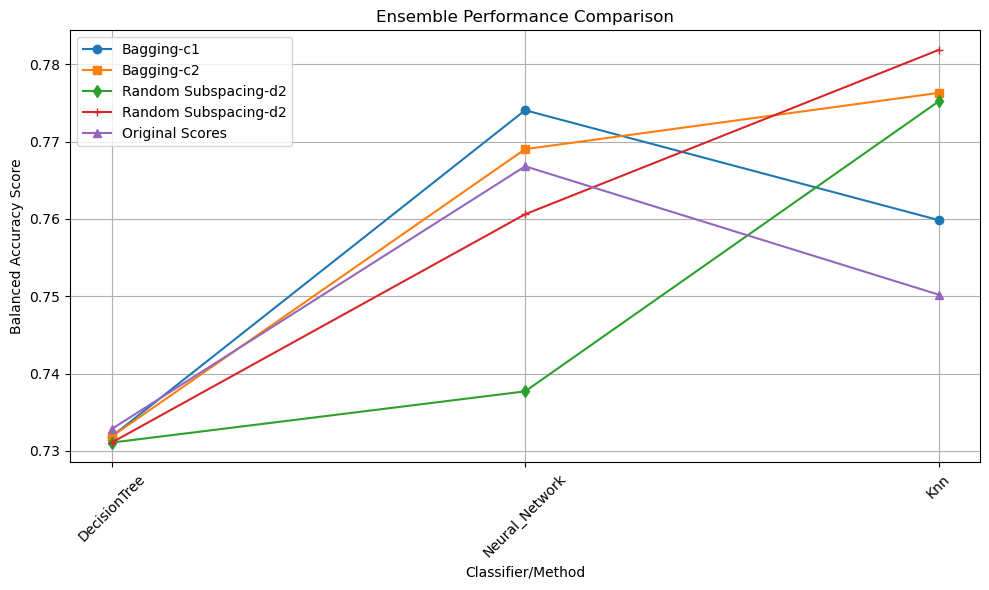

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(final_resultc['Method'], final_resultc['Best_Balanced_Accuracy'], marker='o', label='Bagging-c1')
plt.plot(final_resultc1['Method'], final_resultc1['Best_Balanced_Accuracy'], marker='s', label='Bagging-c2')
plt.plot(final_resultd['Method'], final_resultd['Best_Balanced_Accuracy'], marker='d', label='Random Subspacing-d2')
plt.plot(final_resultd1['Method'], final_resultd1['Best_Balanced_Accuracy'], marker='+', label='Random Subspacing-d2')
plt.plot(result_b['Method'], result_b['Balanced Accuracy Score'], marker='^', label='Original Scores')
plt.xlabel('Classifier/Method')
plt.ylabel('Balanced Accuracy Score')
plt.title('Ensemble Performance Comparison')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Expectation:

**Bagging:** Involves creating multiple subsets of the dataset through bootstrap sampling and training each classifier on these subsets. It's expected to benefit classifiers sensitive to variance and overfitting, like Decision Trees, often providing better performance. The Neural Network was expected to benefit more from Bagging due to its susceptibility to overfitting, aligning with the observed improvement.

**Random Subspacing:** Involves training classifiers on subsets of features, offering diversity by focusing on different subsets of features. It might benefit models suffering from high dimensionality or correlated features.

## Observations:

- **KNN Method:** Demonstrated the best performance in balanced accuracy score, especially with random subspacing and random features search. This outcome diverged from the expected result. Both techniques in Tasks (c) and (d) improved the balanced accuracy compared to the original score.
  
- **Decision Trees:** Both techniques maintained similar performance compared to the original classifier, showing the lowest performance among the classifiers.
  
- **Neural Network:** Utilizing bagging with bootstrap and changing the number of instances improved the balanced score in Task (c). However, in Task (b), random subspacing didn't yield a positive impact on neural network performance, falling below the original score.

## Overall:

- **Bagging Technique:** Helps improve balanced accuracy in all three classifiers.
  
- **Random Subspacing:** Only KNN performs well with this technique.

## Improvement Suggestions:

- **Further Experimentation:** Try different ensemble sizes or subspacing values together to potentially enhance performance.
  
- **Determine Ensemble Diversity:** Assess the diversity within ensembles created through Bagging and Random Subspacing.
  
- **Enhance Ensemble Performance:** Increase diversity by incorporating more diverse base classifiers or optimizing hyperparameters, especially for Decision Trees. Evaluate the utilization of different subsets of data or features to enhance ensemble performance.


## Question 2:
You are given a set of 10 balls and 10 bins (numbered 0 to 9). Initially, all the balls are in the 
bin number 5 and your goal is to ensure that the balls are well distributed across the bins 
eventually. Ideally, all balls should be in different bins. Train a reinforcement learning (RL) 
agent that should consider all balls in turn and for each ball b, decide whether to keep the 
ball in the current bin Bb or move it to the bin Bb - 1  or move it to the bin Bb + 1. Note that the 
action to move to bin Bb - 1 is only permissible if Bb – 1 >= 0 and the action to move it to the 
bin Bb + 1 is only permissible if Bb + 1 <= 9. 

### (a) 
Carefully decide the features to use in the state representation of your RL agent. Also, 
carefully decide the reward function for your RL agent and the length of an episode. Note 
that you can also have contextual features in your state representation, i.e., features that are 
specific to the ball with the current turn. 

## Initial Parameters:

- **Bin Occupancy:** Represents the occupancy of each bin initially set to `[0, 0, 0, 0, 10, 0, 0, 0, 0, 0]`.
- **Ball Positions:** Indicates the initial position of balls in each bin, denoted by `[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]`.
- **Current Ball:** Indicates the ball to be moved in a step, indexed from 0 to 9.
- **Observation Space:** The environment's observation space, returning the ball's position in different bins (`[10]*10`).

## Task Actions:

The agent has three possible actions for each ball:
- **Stay:** Keep the ball in its current bin.
- **Move Left:** Move the ball to the left adjacent bin (if the current position > 0).
- **Move Right:** Move the ball to the right adjacent bin (if the current position < 9).

## Reset Function:

The reset function returns the initial observation to restart the environment.

## Render Function:

- **Bins Status:** Displays the number of balls in each bin.
- **Current Ball:** Indicates which ball needs to be moved in the step.

## Update Ball Function:

This function ensures that each step moves a different ball, looping until all balls are in different bins.

## Reward Function:

- **Positive Reward:** Grants a positive reward when a ball moves to a different bin (+10 points).
- **Negative Reward:** Penalizes the agent for moving a ball to a bin that already contains a ball (-10 points).
- **Terminal Reward:** Rewards the agent when all balls are in different bins, signaling the game's completion (+100 points). However, due to issues, the reward system is currently disabled.

## Episode Length:

An episode's length is defined as the number of steps. A reasonable episode length is set to 80, aiming to achieve the game's completion within 40+ steps.


In [139]:
import gymnasium as gym
from gymnasium import spaces
import torch as th
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import DQN, PPO, A2C

In [77]:
class CustomEnv(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self):
        super(CustomEnv, self).__init__()
        self.bins = [0, 0, 0, 0, 0, 10, 0, 0, 0, 0]
        self.balls = [5]*10
        self.current_ball = 0
        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.MultiDiscrete([10]*10)
    def step(self, action):
        self._take_action(action)
        self._update_current_ball()
        #reward = self._calculate_reward()
        #reward = np.var(self.bins)
        if np.var(self.bins)==0:
            reward = 100
            terminated = True
        else:
            reward = 0
            terminated = False
        truncated = terminated
        obs = np.array(self.balls)
        return obs, reward, terminated, truncated, {}

    def reset(self, seed=0):
        self.bins = [0, 0, 0, 0, 0, 10, 0, 0, 0, 0]
        self.balls = [5]*10
        self.current_ball = 0
        obs = np.array(self.balls)
        return obs, {}

    def render(self, mode='human'):
        print("Bins :", self.bins)
        print("Current ball:", self.current_ball, "\n")

    def close(self):
        pass
    def _take_action(self, action):
        ball_pos = self.balls[self.current_ball]
        if action == 0 and ball_pos > 0:
            # Move left
            if self.bins[ball_pos - 1] == 0 or sum(self.bins[:ball_pos]) < ball_pos:
                self.bins[ball_pos] -= 1
                self.bins[ball_pos - 1] += 1
                self.balls[self.current_ball] -= 1

        elif action == 2 and ball_pos < 9:
            # Move right
            if self.bins[ball_pos + 1] == 0 or sum(self.bins[ball_pos + 1:]) < (9 - ball_pos):
                self.bins[ball_pos] -= 1
                self.bins[ball_pos + 1] += 1
                self.balls[self.current_ball] += 1

    def _update_current_ball(self):
        if self.current_ball == 9 :
            self.current_ball = 0
        else:
            self.current_ball +=1 
    # def _calculate_reward(self):
    #     reward = 0
    #     current_ball_pos = self.balls[self.current_ball]

    #     if self.bins[current_ball_pos] > 1:
    #         reward -= 10
    #     else:
    #         reward += 10

    #     return reward

In [78]:
env = CustomEnv()
print(env.observation_space)

MultiDiscrete([10 10 10 10 10 10 10 10 10 10])


In [79]:
check_env(env, warn=True)

(c) Compare the RL strategies PPO, DQN and A2C for this problem. Are they able to learn 
a consistent winning policy after (i) 50,000 episodes, (ii) 100,000 episodes and (iii) 200,000 
episodes? Which policy learns the strategy quickest? Why do you think this is the case?

In [80]:
def run_model(model,n_steps,env):
    obs, info = env.reset()
    for step in range(n_steps):
        action, _ = model.predict(obs, deterministic=True) #Retrieve a choice of action from the agent
        print("Step {}".format(step + 1))
        print("Action: ", action)
        
        obs, reward, terminated, truncated, info = env.step(action) #Advance the environment using the step function
        print('obs =', obs, 'reward =', reward, 'Terminated:', terminated)
        env.render(mode='human')
        if terminated:
            print("------------------------------Goal reached!", "reward=", reward,"---------------------------------------")
            break

In [81]:
model1 = A2C('MlpPolicy', env, verbose=1,learning_rate=0.001)
model1.learn(total_timesteps=50000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 158       |
|    ep_rew_mean        | 100       |
| time/                 |           |
|    fps                | 506       |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.793    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.001     |
|    n_updates          | 99        |
|    policy_loss        | -0.0124   |
|    value_loss         | 0.00078   |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 99.7     |
|    ep_rew_mean        | 100      |
| time/                 |          |
|    fps                | 575      |
|    iterations         | 200      |
|

In [82]:
run_model(model1,80,env)

Step 1
Action:  2
obs = [6 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 9, 1, 0, 0, 0]
Current ball: 1 

Step 2
Action:  2
obs = [6 6 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 8, 2, 0, 0, 0]
Current ball: 2 

Step 3
Action:  2
obs = [6 6 6 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 7, 3, 0, 0, 0]
Current ball: 3 

Step 4
Action:  2
obs = [6 6 6 6 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 6, 4, 0, 0, 0]
Current ball: 4 

Step 5
Action:  0
obs = [6 6 6 6 4 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 1, 5, 4, 0, 0, 0]
Current ball: 5 

Step 6
Action:  0
obs = [6 6 6 6 4 4 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 2, 4, 4, 0, 0, 0]
Current ball: 6 

Step 7
Action:  0
obs = [6 6 6 6 4 4 4 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 3, 3, 4, 0, 0, 0]
Current ball: 7 

Step 8
Action:  0
obs = [6 6 6 6 4 4 4 4 5 5] reward = 0 Terminated: False
Bins : [

In [83]:
model2 = A2C('MlpPolicy', env, verbose=1,learning_rate=0.001)
model2.learn(total_timesteps=100000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 83.3     |
|    ep_rew_mean        | 100      |
| time/                 |          |
|    fps                | 562      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.1     |
|    explained_variance | -229     |
|    learning_rate      | 0.001    |
|    n_updates          | 99       |
|    policy_loss        | -0.112   |
|    value_loss         | 0.0143   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 87.8     |
|    ep_rew_mean        | 100      |
| time/                 |          |
|    fps                | 555      |
|    iterations         | 200      |
|    time_elapsed 

In [84]:
run_model(model2,80,env)

Step 1
Action:  0
obs = [4 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 1, 9, 0, 0, 0, 0]
Current ball: 1 

Step 2
Action:  0
obs = [4 4 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 2, 8, 0, 0, 0, 0]
Current ball: 2 

Step 3
Action:  0
obs = [4 4 4 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 3, 7, 0, 0, 0, 0]
Current ball: 3 

Step 4
Action:  0
obs = [4 4 4 4 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 4, 6, 0, 0, 0, 0]
Current ball: 4 

Step 5
Action:  0
obs = [4 4 4 4 4 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 5, 5, 0, 0, 0, 0]
Current ball: 5 

Step 6
Action:  0
obs = [4 4 4 4 4 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 5, 5, 0, 0, 0, 0]
Current ball: 6 

Step 7
Action:  0
obs = [4 4 4 4 4 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 5, 5, 0, 0, 0, 0]
Current ball: 7 

Step 8
Action:  0
obs = [4 4 4 4 4 5 5 5 5 5] reward = 0 Terminated: False
Bins : [

In [85]:
model3 = A2C('MlpPolicy', env, verbose=1,learning_rate=0.001)
model3.learn(total_timesteps=200000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 144      |
|    ep_rew_mean        | 100      |
| time/                 |          |
|    fps                | 515      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.07    |
|    explained_variance | -399     |
|    learning_rate      | 0.001    |
|    n_updates          | 99       |
|    policy_loss        | 0.0568   |
|    value_loss         | 0.0161   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 133      |
|    ep_rew_mean        | 100      |
| time/                 |          |
|    fps                | 557      |
|    iterations         | 200      |
|    time_elapsed 

In [86]:
run_model(model3,80,env)

Step 1
Action:  2
obs = [6 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 9, 1, 0, 0, 0]
Current ball: 1 

Step 2
Action:  0
obs = [6 4 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 1, 8, 1, 0, 0, 0]
Current ball: 2 

Step 3
Action:  0
obs = [6 4 4 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 2, 7, 1, 0, 0, 0]
Current ball: 3 

Step 4
Action:  0
obs = [6 4 4 4 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 3, 6, 1, 0, 0, 0]
Current ball: 4 

Step 5
Action:  0
obs = [6 4 4 4 4 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 4, 5, 1, 0, 0, 0]
Current ball: 5 

Step 6
Action:  0
obs = [6 4 4 4 4 4 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 5, 4, 1, 0, 0, 0]
Current ball: 6 

Step 7
Action:  0
obs = [6 4 4 4 4 4 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 5, 4, 1, 0, 0, 0]
Current ball: 7 

Step 8
Action:  0
obs = [6 4 4 4 4 4 5 5 5 5] reward = 0 Terminated: False
Bins : [

In [87]:
model4 = PPO('MlpPolicy', env, verbose=1,learning_rate=0.001)
model4.learn(total_timesteps=50000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 95.3     |
|    ep_rew_mean     | 100      |
| time/              |          |
|    fps             | 1119     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 95.1        |
|    ep_rew_mean          | 100         |
| time/                   |             |
|    fps                  | 877         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.012005246 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -0.00649    |
|    learning_rate        | 0.

In [88]:
run_model(model4,80,env)

Step 1
Action:  0
obs = [4 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 1, 9, 0, 0, 0, 0]
Current ball: 1 

Step 2
Action:  2
obs = [4 6 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 1, 8, 1, 0, 0, 0]
Current ball: 2 

Step 3
Action:  2
obs = [4 6 6 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 1, 7, 2, 0, 0, 0]
Current ball: 3 

Step 4
Action:  2
obs = [4 6 6 6 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 1, 6, 3, 0, 0, 0]
Current ball: 4 

Step 5
Action:  0
obs = [4 6 6 6 4 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 2, 5, 3, 0, 0, 0]
Current ball: 5 

Step 6
Action:  0
obs = [4 6 6 6 4 4 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 3, 4, 3, 0, 0, 0]
Current ball: 6 

Step 7
Action:  0
obs = [4 6 6 6 4 4 4 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 4, 3, 3, 0, 0, 0]
Current ball: 7 

Step 8
Action:  0
obs = [4 6 6 6 4 4 4 4 5 5] reward = 0 Terminated: False
Bins : [

In [89]:
model5 = PPO('MlpPolicy', env, verbose=1,learning_rate=0.001)
model5.learn(total_timesteps=100000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 107      |
|    ep_rew_mean     | 100      |
| time/              |          |
|    fps             | 1099     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 109         |
|    ep_rew_mean          | 100         |
| time/                   |             |
|    fps                  | 870         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.012295371 |
|    clip_fraction        | 0.124       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -0.00152    |
|    learning_rate        | 0.

In [90]:
run_model(model5,80,env)

Step 1
Action:  0
obs = [4 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 1, 9, 0, 0, 0, 0]
Current ball: 1 

Step 2
Action:  0
obs = [4 4 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 2, 8, 0, 0, 0, 0]
Current ball: 2 

Step 3
Action:  0
obs = [4 4 4 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 3, 7, 0, 0, 0, 0]
Current ball: 3 

Step 4
Action:  0
obs = [4 4 4 4 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 4, 6, 0, 0, 0, 0]
Current ball: 4 

Step 5
Action:  0
obs = [4 4 4 4 4 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 5, 5, 0, 0, 0, 0]
Current ball: 5 

Step 6
Action:  2
obs = [4 4 4 4 4 6 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 5, 4, 1, 0, 0, 0]
Current ball: 6 

Step 7
Action:  2
obs = [4 4 4 4 4 6 6 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 5, 3, 2, 0, 0, 0]
Current ball: 7 

Step 8
Action:  2
obs = [4 4 4 4 4 6 6 6 5 5] reward = 0 Terminated: False
Bins : [

In [91]:
model6 = PPO('MlpPolicy', env, verbose=1,learning_rate=0.001)
model6.learn(total_timesteps=200000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 105      |
|    ep_rew_mean     | 100      |
| time/              |          |
|    fps             | 1157     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 102         |
|    ep_rew_mean          | 100         |
| time/                   |             |
|    fps                  | 884         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013086351 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 0.00181     |
|    learning_rate        | 0.

In [92]:
run_model(model6,80,env)

Step 1
Action:  0
obs = [4 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 1, 9, 0, 0, 0, 0]
Current ball: 1 

Step 2
Action:  0
obs = [4 4 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 2, 8, 0, 0, 0, 0]
Current ball: 2 

Step 3
Action:  2
obs = [4 4 6 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 2, 7, 1, 0, 0, 0]
Current ball: 3 

Step 4
Action:  2
obs = [4 4 6 6 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 2, 6, 2, 0, 0, 0]
Current ball: 4 

Step 5
Action:  2
obs = [4 4 6 6 6 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 2, 5, 3, 0, 0, 0]
Current ball: 5 

Step 6
Action:  2
obs = [4 4 6 6 6 6 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 2, 4, 4, 0, 0, 0]
Current ball: 6 

Step 7
Action:  2
obs = [4 4 6 6 6 6 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 2, 4, 4, 0, 0, 0]
Current ball: 7 

Step 8
Action:  2
obs = [4 4 6 6 6 6 5 5 5 5] reward = 0 Terminated: False
Bins : [

In [93]:
model7 = DQN('MlpPolicy', env, verbose=1,learning_rate=0.001)
model7.learn(total_timesteps=50000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 108      |
|    ep_rew_mean      | 100      |
|    exploration_rate | 0.918    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 6818     |
|    time_elapsed     | 0        |
|    total_timesteps  | 433      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 102      |
|    ep_rew_mean      | 100      |
|    exploration_rate | 0.845    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 6907     |
|    time_elapsed     | 0        |
|    total_timesteps  | 815      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 108      |
|    ep_rew_mean      | 100      |
|    exploration_rate | 0.753    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 7088     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1302     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 104      |
|    ep_rew_mean      | 100      |
|    exploration_rate | 0.683    |
| time/               |          |
|    episodes       

In [94]:
run_model(model7,80,env)

Step 1
Action:  0
obs = [4 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 1, 9, 0, 0, 0, 0]
Current ball: 1 

Step 2
Action:  0
obs = [4 4 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 2, 8, 0, 0, 0, 0]
Current ball: 2 

Step 3
Action:  0
obs = [4 4 4 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 3, 7, 0, 0, 0, 0]
Current ball: 3 

Step 4
Action:  0
obs = [4 4 4 4 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 4, 6, 0, 0, 0, 0]
Current ball: 4 

Step 5
Action:  0
obs = [4 4 4 4 4 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 5, 5, 0, 0, 0, 0]
Current ball: 5 

Step 6
Action:  0
obs = [4 4 4 4 4 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 5, 5, 0, 0, 0, 0]
Current ball: 6 

Step 7
Action:  0
obs = [4 4 4 4 4 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 5, 5, 0, 0, 0, 0]
Current ball: 7 

Step 8
Action:  0
obs = [4 4 4 4 4 5 5 5 5 5] reward = 0 Terminated: False
Bins : [

In [95]:
model8 = DQN('MlpPolicy', env, verbose=1,learning_rate=0.001)
model8.learn(total_timesteps=100000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 110      |
|    ep_rew_mean      | 100      |
|    exploration_rate | 0.958    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 6844     |
|    time_elapsed     | 0        |
|    total_timesteps  | 438      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 104      |
|    ep_rew_mean      | 100      |
|    exploration_rate | 0.921    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 6853     |
|    time_elapsed     | 0        |
|    total_timesteps  | 830      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 104      |
|    ep_rew_mean      | 100    

In [96]:
run_model(model8,80,env)

Step 1
Action:  1
obs = [5 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 10, 0, 0, 0, 0]
Current ball: 1 

Step 2
Action:  1
obs = [5 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 10, 0, 0, 0, 0]
Current ball: 2 

Step 3
Action:  1
obs = [5 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 10, 0, 0, 0, 0]
Current ball: 3 

Step 4
Action:  1
obs = [5 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 10, 0, 0, 0, 0]
Current ball: 4 

Step 5
Action:  1
obs = [5 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 10, 0, 0, 0, 0]
Current ball: 5 

Step 6
Action:  1
obs = [5 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 10, 0, 0, 0, 0]
Current ball: 6 

Step 7
Action:  1
obs = [5 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 10, 0, 0, 0, 0]
Current ball: 7 

Step 8
Action:  1
obs = [5 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
B

In [97]:
model9 = DQN('MlpPolicy', env, verbose=1,learning_rate=0.001)
model9.learn(total_timesteps=200000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 101      |
|    ep_rew_mean      | 100      |
|    exploration_rate | 0.981    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 4599     |
|    time_elapsed     | 0        |
|    total_timesteps  | 405      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.1     |
|    ep_rew_mean      | 100      |
|    exploration_rate | 0.964    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 5474     |
|    time_elapsed     | 0        |
|    total_timesteps  | 761      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96.3     |
|    ep_rew_mean      | 100      |
|    exploration_rate | 0.945    |
| time/               |          |
|    episodes       

In [98]:
run_model(model9,80,env)

Step 1
Action:  2
obs = [6 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 9, 1, 0, 0, 0]
Current ball: 1 

Step 2
Action:  2
obs = [6 6 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 8, 2, 0, 0, 0]
Current ball: 2 

Step 3
Action:  2
obs = [6 6 6 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 7, 3, 0, 0, 0]
Current ball: 3 

Step 4
Action:  2
obs = [6 6 6 6 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 6, 4, 0, 0, 0]
Current ball: 4 

Step 5
Action:  2
obs = [6 6 6 6 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 6, 4, 0, 0, 0]
Current ball: 5 

Step 6
Action:  2
obs = [6 6 6 6 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 6, 4, 0, 0, 0]
Current ball: 6 

Step 7
Action:  2
obs = [6 6 6 6 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 6, 4, 0, 0, 0]
Current ball: 7 

Step 8
Action:  2
obs = [6 6 6 6 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [

After train the model in different 3 methods with 50000,100000,200000. I got these results:    
A2C with total_timesteps=50000 took `55` steps.  
A2C with total_timesteps=100000 took `76` steps.  
A2C with total_timesteps=200000 took `71` steps.  
PPO with total_timesteps=50000 took `65` steps.  
PPO with total_timesteps=100000 took `46` steps.  
PPO with total_timesteps=200000 did not reach termination within 80 steps.  
DQN with various timesteps did not reach termination within 80 steps.  

#### Best `PPO` with total_timesteps=100000 took `46` steps. 

Comparing the A2C and PPO results, it seems that PPO was able to learn the strategy quicker than A2C in most cases. With a lower number of timesteps, PPO showed a better learning efficiency than A2C, converging to a winning strategy with fewer steps.

However, it's essential to note that both A2C and PPO are on-policy methods, while DQN is an off-policy method. A2C and PPO tend to have more stable and reliable training, especially in environments where the policy is complex or has high variance. DQN, being off-policy, might require more samples or a better exploration strategy to learn effectively.

PPO's faster learning might be due to its advantage in handling the exploration-exploitation trade-off, enabling it to learn the optimal policy more efficiently with fewer steps compared to A2C. Additionally, the specific hyperparameters, network architectures, and environmental complexities also influence the learning efficiency of these algorithms. Adjusting hyperparameters or using different exploration strategies might potentially improve the performance of DQN or other algorithms.


## (d)
For the best RL strategy, start with a neural network architecture consisting of 3 hidden layers of 64 neurons each and gradually decrease the number of neurons and 
number of layers. What is the minimal architecture that still allows you to successfully learn 
a winning strategy? For example, can you learn a winning strategy with a single hidden layer 
of 2 neurons? Why do you think this is the case?  

In [122]:
policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=[64, 64, 64])

In [123]:
model_best1 = PPO('MlpPolicy', env, verbose=1,policy_kwargs = policy_kwargs ,learning_rate=0.001)
model_best1.learn(total_timesteps=100000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 104      |
|    ep_rew_mean     | 100      |
| time/              |          |
|    fps             | 954      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 101        |
|    ep_rew_mean          | 100        |
| time/                   |            |
|    fps                  | 782        |
|    iterations           | 2          |
|    time_elapsed         | 5          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.01134216 |
|    clip_fraction        | 0.0933     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.09      |
|    explained_variance   | 0.000981   |
|    learning_rate        | 0.001      |
|   

In [124]:
run_model(model_best1,80,env)

Step 1
Action:  2
obs = [6 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 9, 1, 0, 0, 0]
Current ball: 1 

Step 2
Action:  2
obs = [6 6 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 8, 2, 0, 0, 0]
Current ball: 2 

Step 3
Action:  2
obs = [6 6 6 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 7, 3, 0, 0, 0]
Current ball: 3 

Step 4
Action:  2
obs = [6 6 6 6 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 6, 4, 0, 0, 0]
Current ball: 4 

Step 5
Action:  0
obs = [6 6 6 6 4 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 1, 5, 4, 0, 0, 0]
Current ball: 5 

Step 6
Action:  0
obs = [6 6 6 6 4 4 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 2, 4, 4, 0, 0, 0]
Current ball: 6 

Step 7
Action:  0
obs = [6 6 6 6 4 4 4 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 3, 3, 4, 0, 0, 0]
Current ball: 7 

Step 8
Action:  0
obs = [6 6 6 6 4 4 4 4 5 5] reward = 0 Terminated: False
Bins : [

In [137]:
policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=[32, 32])
model_best2 = PPO('MlpPolicy', env, verbose=1,policy_kwargs = policy_kwargs ,learning_rate=0.001)
model_best2.learn(total_timesteps=100000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 97.1     |
|    ep_rew_mean     | 100      |
| time/              |          |
|    fps             | 894      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 91.8        |
|    ep_rew_mean          | 100         |
| time/                   |             |
|    fps                  | 749         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009460518 |
|    clip_fraction        | 0.0811      |
|    clip_range           | 0.2         |
|    entropy_loss   

In [138]:
run_model(model_best2,80,env)

Step 1
Action:  2
obs = [6 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 9, 1, 0, 0, 0]
Current ball: 1 

Step 2
Action:  2
obs = [6 6 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 8, 2, 0, 0, 0]
Current ball: 2 

Step 3
Action:  0
obs = [6 6 4 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 1, 7, 2, 0, 0, 0]
Current ball: 3 

Step 4
Action:  0
obs = [6 6 4 4 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 2, 6, 2, 0, 0, 0]
Current ball: 4 

Step 5
Action:  0
obs = [6 6 4 4 4 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 3, 5, 2, 0, 0, 0]
Current ball: 5 

Step 6
Action:  0
obs = [6 6 4 4 4 4 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 4, 4, 2, 0, 0, 0]
Current ball: 6 

Step 7
Action:  0
obs = [6 6 4 4 4 4 4 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 5, 3, 2, 0, 0, 0]
Current ball: 7 

Step 8
Action:  2
obs = [6 6 4 4 4 4 4 6 5 5] reward = 0 Terminated: False
Bins : [

In [127]:
policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=[32, 32, 32])
model_best3 = PPO('MlpPolicy', env, verbose=1,policy_kwargs = policy_kwargs ,learning_rate=0.001)
model_best3.learn(total_timesteps=100000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 101      |
|    ep_rew_mean     | 100      |
| time/              |          |
|    fps             | 958      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 97.5         |
|    ep_rew_mean          | 100          |
| time/                   |              |
|    fps                  | 730          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0074507315 |
|    clip_fraction        | 0.0169       |
|    clip_range           | 0.2          |
|    en

In [128]:
run_model(model_best3,80,env)

Step 1
Action:  0
obs = [4 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 1, 9, 0, 0, 0, 0]
Current ball: 1 

Step 2
Action:  0
obs = [4 4 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 2, 8, 0, 0, 0, 0]
Current ball: 2 

Step 3
Action:  0
obs = [4 4 4 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 3, 7, 0, 0, 0, 0]
Current ball: 3 

Step 4
Action:  0
obs = [4 4 4 4 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 4, 6, 0, 0, 0, 0]
Current ball: 4 

Step 5
Action:  0
obs = [4 4 4 4 4 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 5, 5, 0, 0, 0, 0]
Current ball: 5 

Step 6
Action:  2
obs = [4 4 4 4 4 6 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 5, 4, 1, 0, 0, 0]
Current ball: 6 

Step 7
Action:  2
obs = [4 4 4 4 4 6 6 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 5, 3, 2, 0, 0, 0]
Current ball: 7 

Step 8
Action:  2
obs = [4 4 4 4 4 6 6 6 5 5] reward = 0 Terminated: False
Bins : [

In [129]:
policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=[16, 16, 16])
model_best4 = PPO('MlpPolicy', env, verbose=1,policy_kwargs = policy_kwargs ,learning_rate=0.001)
model_best4.learn(total_timesteps=100000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 105      |
|    ep_rew_mean     | 100      |
| time/              |          |
|    fps             | 1108     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 97           |
|    ep_rew_mean          | 100          |
| time/                   |              |
|    fps                  | 871          |
|    iterations           | 2            |
|    time_elapsed         | 4            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0026197736 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.1         |
|    explained_variance   | 0.00154      |
|    learning_r

In [130]:
run_model(model_best4,80,env)

Step 1
Action:  2
obs = [6 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 9, 1, 0, 0, 0]
Current ball: 1 

Step 2
Action:  2
obs = [6 6 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 8, 2, 0, 0, 0]
Current ball: 2 

Step 3
Action:  2
obs = [6 6 6 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 7, 3, 0, 0, 0]
Current ball: 3 

Step 4
Action:  0
obs = [6 6 6 4 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 1, 6, 3, 0, 0, 0]
Current ball: 4 

Step 5
Action:  0
obs = [6 6 6 4 4 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 2, 5, 3, 0, 0, 0]
Current ball: 5 

Step 6
Action:  0
obs = [6 6 6 4 4 4 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 3, 4, 3, 0, 0, 0]
Current ball: 6 

Step 7
Action:  0
obs = [6 6 6 4 4 4 4 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 4, 3, 3, 0, 0, 0]
Current ball: 7 

Step 8
Action:  2
obs = [6 6 6 4 4 4 4 6 5 5] reward = 0 Terminated: False
Bins : [

In [131]:
policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=[8, 8])
model_best5 = PPO('MlpPolicy', env, verbose=1,policy_kwargs = policy_kwargs ,learning_rate=0.001)
model_best5.learn(total_timesteps=100000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 94.3     |
|    ep_rew_mean     | 100      |
| time/              |          |
|    fps             | 1109     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 90.4         |
|    ep_rew_mean          | 100          |
| time/                   |              |
|    fps                  | 929          |
|    iterations           | 2            |
|    time_elapsed         | 4            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0055186963 |
|    clip_fraction        | 0.0153       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.1         |
|    explained_variance   | 0.000472     |
|    learning_r

In [132]:
run_model(model_best5,80,env)

Step 1
Action:  0
obs = [4 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 1, 9, 0, 0, 0, 0]
Current ball: 1 

Step 2
Action:  0
obs = [4 4 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 2, 8, 0, 0, 0, 0]
Current ball: 2 

Step 3
Action:  0
obs = [4 4 4 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 3, 7, 0, 0, 0, 0]
Current ball: 3 

Step 4
Action:  2
obs = [4 4 4 6 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 3, 6, 1, 0, 0, 0]
Current ball: 4 

Step 5
Action:  2
obs = [4 4 4 6 6 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 3, 5, 2, 0, 0, 0]
Current ball: 5 

Step 6
Action:  2
obs = [4 4 4 6 6 6 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 3, 4, 3, 0, 0, 0]
Current ball: 6 

Step 7
Action:  2
obs = [4 4 4 6 6 6 6 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 3, 3, 4, 0, 0, 0]
Current ball: 7 

Step 8
Action:  0
obs = [4 4 4 6 6 6 6 4 5 5] reward = 0 Terminated: False
Bins : [

In [133]:
policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=[2])
model_best6 = PPO('MlpPolicy', env, verbose=1,policy_kwargs = policy_kwargs ,learning_rate=0.001)
model_best6.learn(total_timesteps=100000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | 100      |
| time/              |          |
|    fps             | 944      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 99           |
|    ep_rew_mean          | 100          |
| time/                   |              |
|    fps                  | 828          |
|    iterations           | 2            |
|    time_elapsed         | 4            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0041692583 |
|    clip_fraction        | 0.00537      |
|    clip_range           | 0.2          |
|    en

In [134]:
run_model(model_best6,80,env)

Step 1
Action:  2
obs = [6 5 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 9, 1, 0, 0, 0]
Current ball: 1 

Step 2
Action:  2
obs = [6 6 5 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 8, 2, 0, 0, 0]
Current ball: 2 

Step 3
Action:  2
obs = [6 6 6 5 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 7, 3, 0, 0, 0]
Current ball: 3 

Step 4
Action:  2
obs = [6 6 6 6 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 6, 4, 0, 0, 0]
Current ball: 4 

Step 5
Action:  2
obs = [6 6 6 6 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 6, 4, 0, 0, 0]
Current ball: 5 

Step 6
Action:  2
obs = [6 6 6 6 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 6, 4, 0, 0, 0]
Current ball: 6 

Step 7
Action:  2
obs = [6 6 6 6 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [0, 0, 0, 0, 0, 6, 4, 0, 0, 0]
Current ball: 7 

Step 8
Action:  2
obs = [6 6 6 6 5 5 5 5 5 5] reward = 0 Terminated: False
Bins : [

After observing the performance of different neural network architectures:

- Using [64, 64, 64] neurons and layers resulted in 46 steps to reach the goal.
- [32, 32, 32] neurons and layers achieved 44 steps to reach the goal.
- [32, 32] neurons and layers took 45 steps to reach the goal.
- [16, 16, 16] neurons and layers resulted in 46 steps.
- [8, 8] neurons and layers achieved the goal in 46 steps.
- A single layer with [2] neurons took 75 steps to reach the goal.

The most efficient architecture was [32, 32, 32] with 41 steps, while even the simplest architecture with only one layer and [2] neurons could still reach the goal, albeit taking more steps.


Overall, for this task the success with a simpler neural network architecture might be due to the task's inherent simplicity, the effectiveness of the learning algorithm, the nature of the data, and the algorithm's ability to generalize from the observed experiences. However, in more complex environments or tasks, a more intricate architecture might be necessary to capture and comprehend the nuances and complexities for better performance.